# Basil in Space Data Visualization

## Imports

In [34]:
!pip install joypy

In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import PathPatch
from joypy import joyplot

import glob
import zipfile

## Data Preparation

In [36]:
!wget --no-check-certificate \
    "https://github.com//Pinkshepz/AHiS161-Basil-in-Space/archive/refs/heads/main.zip" \
    -O "/main.zip"


zip_ref = zipfile.ZipFile('/main.zip', 'r')
zip_ref.extractall('/main')
zip_ref.close()

--2021-07-25 04:09:22--  https://github.com//Pinkshepz/AHiS161-Basil-in-Space/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Pinkshepz/AHiS161-Basil-in-Space/zip/refs/heads/main [following]
--2021-07-25 04:09:22--  https://codeload.github.com/Pinkshepz/AHiS161-Basil-in-Space/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/main.zip’

/main.zip               [ <=>                ]  20.76K  --.-KB/s    in 0.01s   

2021-07-25 04:09:22 (1.62 MB/s) - ‘/main.zip’ saved [21254]



In [37]:
path = "/AHiS161-Basil-in-Space-main/Basil_pdx.xlsx"

In [58]:
basil_1 = pd.read_excel(path, sheet_name='Sheet1')
basil_1.head(5)

,PPFD,ID,Day,Stem_length,Leaf_length,Leaf_width,Leaf_num
0,40,1,10,1.6,0.5,0.7,4
1,40,2,10,1.0,0.5,0.6,4
2,40,3,10,0.8,0.4,0.4,4
3,40,4,10,1.7,0.4,0.4,2
4,40,5,10,1.2,0.6,0.8,4


In [39]:
basil_2 = pd.read_excel(path, sheet_name='Sheet2')
basil_2.head(5)

,Day,PPFD,Weight,Germination_Rate,Leaf_num,Leaf_num_ave,SD,Leaf_count
0,1,40,211.6,0.00,{},0.00,0.000,0
1,2,40,209.9,0.00,{},0.00,0.000,0
2,3,40,207.7,43.75,{0:7},0.00,0.000,0
3,4,40,205.6,93.75,"{0:2, 2:13}",1.73,0.704,26
4,5,40,204.6,93.75,"{0:2, 2:13}",1.73,0.704,26


In [40]:
basil_LN = basil_1.groupby(by=["Day", "PPFD"]).agg(
    {'Leaf_num' : [np.mean, np.std]}).reset_index()
basil_LN

Day PPFD  Leaf_num          
                mean       std
0  10   40  3.250000  1.238278
1  10   80  3.571429  0.851631
2  20   40  4.000000  1.632993
3  20   80  6.571429  1.452546
4  30   40  6.000000  1.309307
5  30   80  9.214286  3.512145

In [41]:
basil_TH = pd.read_excel(path, sheet_name='Temp_hum')
basil_TH.head(5)

,Day,T_day,T_night,T_ave,H_day,H_night,H_ave,Rain
0,13,29.2,28.4,28.80,69,36,52.5,0
1,14,29.1,26.8,27.95,67,34,50.5,0
2,15,30.8,28.1,29.45,60,32,46.0,0
3,16,30.4,30.3,30.35,64,67,65.5,1
4,17,28.3,28.4,28.35,73,56,64.5,1


In [42]:
basil_joy = pd.read_excel(path, sheet_name='Joyplot')
basil_joy.head(5)

,ID,Day,SL_40,SL_80,LL_40,LL_80,LW_40,LW_80,LN_40,LN_80
0,1,10,1.6,1.8,0.5,0.5,0.7,0.7,4,4.0
1,2,10,1.0,1.7,0.5,0.5,0.6,0.8,4,4.0
2,3,10,0.8,1.9,0.4,0.6,0.4,1.0,4,4.0
3,4,10,1.7,1.5,0.4,0.6,0.4,0.9,2,4.0
4,5,10,1.2,0.3,0.6,0.3,0.8,0.4,4,2.0


## Data Visualization

### Temperature and Humidity Lineplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fde8e0cbb90> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


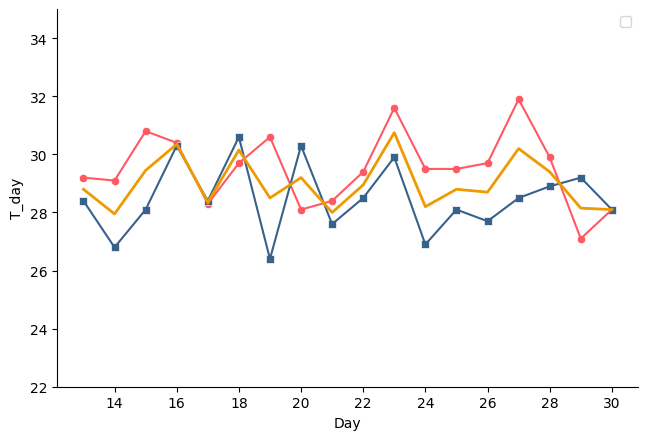

In [43]:
fig = plt.figure(figsize=(7.5, 5))

line1 = sns.lineplot(x="Day", y="T_day", data=basil_TH,
                    color="#ff5964", linewidth=1.5)
line2 = sns.lineplot(x="Day", y="T_night", data=basil_TH,
                    color="#38618c", linewidth=1.5)
line3 = sns.lineplot(x="Day", y="T_ave", data=basil_TH,
                    color="#ef9a00", linewidth=2.0)
point1 = sns.scatterplot(x="Day", y="T_day", data=basil_TH,
                        color="#ff5964", marker="o")
point1 = sns.scatterplot(x="Day", y="T_night", data=basil_TH,
                        color="#38618c", marker="s")

plt.ylim(22, 35)
line1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend(handles=[line1])
line1.spines['right'].set_visible(False)
line1.spines['top'].set_visible(False)
plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fde96a6a850> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists


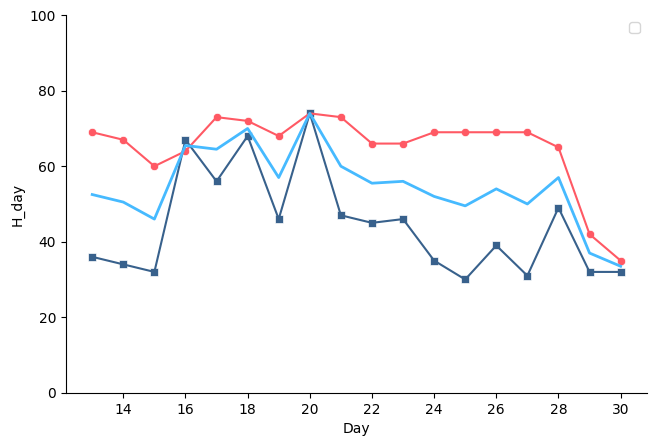

In [44]:
fig = plt.figure(figsize=(7.5, 5))

line1 = sns.lineplot(x="Day", y="H_day", data=basil_TH,
                    color="#ff5964", linewidth=1.5)
line2 = sns.lineplot(x="Day", y="H_night", data=basil_TH,
                    color="#38618c", linewidth=1.5)
line3 = sns.lineplot(x="Day", y="H_ave", data=basil_TH,
                    color="#46baff", linewidth=2.0)
point1 = sns.scatterplot(x="Day", y="H_day", data=basil_TH,
                        color="#ff5964", marker="o")
point1 = sns.scatterplot(x="Day", y="H_night", data=basil_TH,
                        color="#38618c", marker="s")

plt.ylim(0, 100)
line1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.legend(handles=[line1])
line1.spines['right'].set_visible(False)
line1.spines['top'].set_visible(False)
plt.rcParams['figure.dpi'] = 100

### Germination Rate Barplot

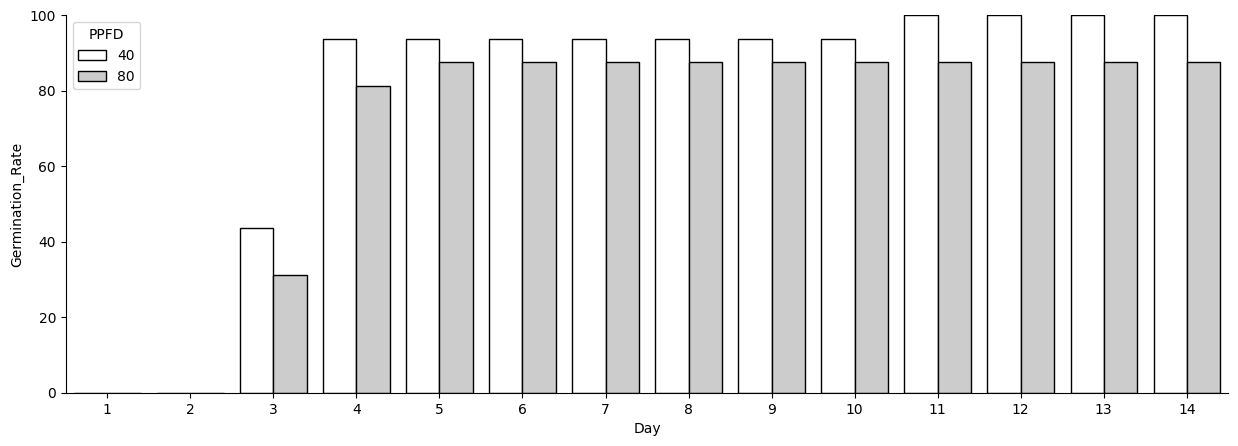

In [45]:
ger_rate = basil_2[basil_2["Day"]<15]

fig = plt.figure(figsize=(15, 5))

ax = sns.barplot(x="Day", y="Germination_Rate", hue="PPFD", data=ger_rate,
                 palette=["#ffffff", "#cccccc"], linewidth=1, edgecolor="black")

plt.ylim([0,100])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rcParams['figure.dpi'] = 100

### Chamber Weight Lineplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fde8deba710> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


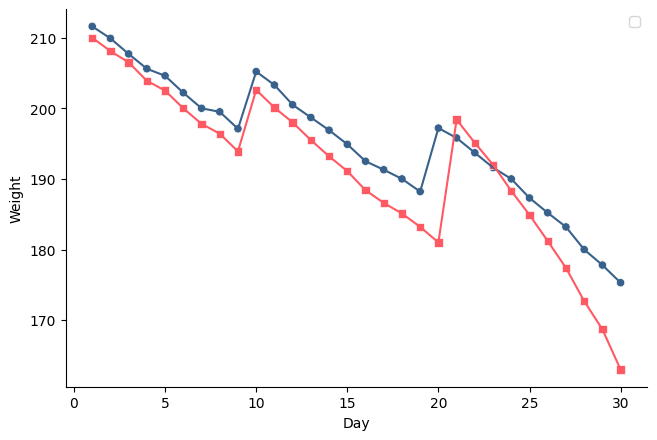

In [46]:
fig = plt.subplots(figsize=(7.5, 5))

line = sns.lineplot(x="Day", y="Weight", hue="PPFD", data=basil_2,
                    palette=["#38618c", "#ff5964"], linewidth=1.5)
point = sns.scatterplot(x="Day", y="Weight", hue="PPFD", data=basil_2,
                        palette=["#38618c", "#ff5964"], style="PPFD", markers={40:"o", 80:"s"})

plt.legend(handles=[line])
line.spines['right'].set_visible(False)
line.spines['top'].set_visible(False)
plt.rcParams['figure.dpi'] = 100

### Stem and Leaf Boxplot and Barplot

In [47]:
def adjust_box_widths(g, fac):
    for ax in g.axes:
        for c in ax.get_children():
            if isinstance(c, PathPatch):
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [48]:
def box_swarmplot(var, label):
  fig = plt.figure(figsize=(7.5, 5))

  swarm = sns.swarmplot(x="Day", y=var, hue="PPFD", split=True, data=basil_1, 
                    palette=["#38618c", "#ff5964"], size=4.0)
  box = sns.boxplot(x="Day", y=var, hue="PPFD", data=basil_1, whis=1.5,
                   linewidth=1.1, width=0.8, palette=["w", "w"])
  adjust_box_widths(fig, 0.6)
    
  plt.legend(handles=[swarm])
  swarm.spines['right'].set_visible(False)
  swarm.spines['top'].set_visible(False)
  plt.rcParams['figure.dpi'] = 100

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fde8e1f2f90> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


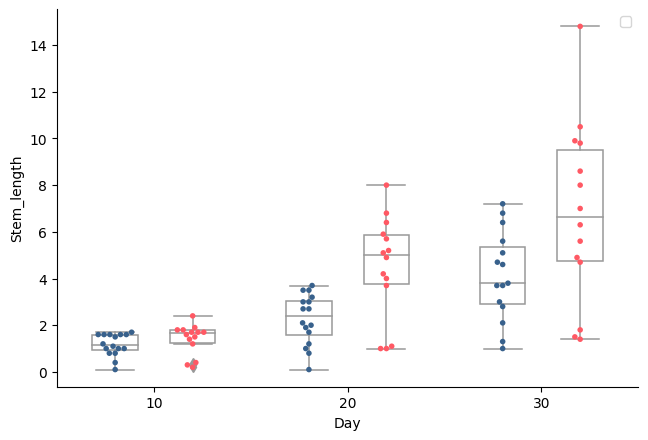

In [49]:
box_swarmplot("Stem_length", 'Length of stem (cm)')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fde9756fc50> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


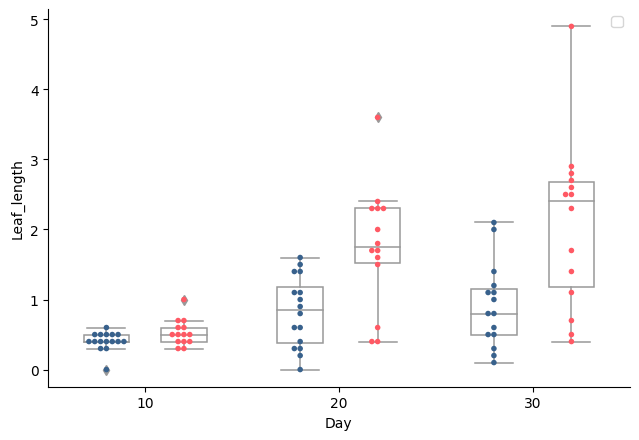

In [50]:
box_swarmplot("Leaf_length", 'Length of laef (cm)')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fde96b4eb90> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


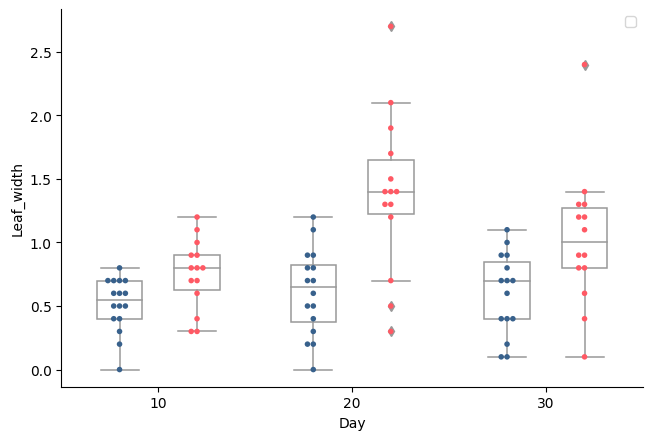

In [51]:
box_swarmplot("Leaf_width", 'Width of leaf (cm)')

No handles with labels found to put in legend.


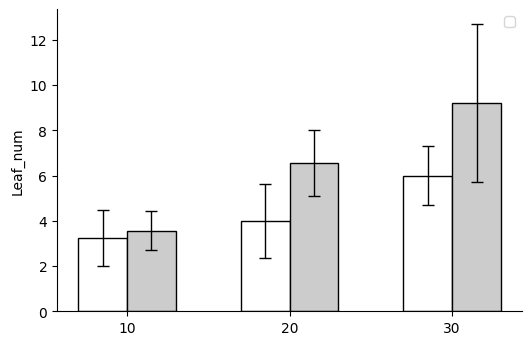

<Figure size 750x500 with 0 Axes>

In [52]:
labels = ["10", "20", "30"]
means_40 = list(basil_LN[basil_LN.PPFD==40][("Leaf_num", "mean")])
means_80 = list(basil_LN[basil_LN.PPFD==80][("Leaf_num", "mean")])
error_40 = list(basil_LN[basil_LN.PPFD==40][("Leaf_num", "std")])
error_80 = list(basil_LN[basil_LN.PPFD==80][("Leaf_num", "std")])

x = np.arange(len(labels))
width = 0.30

fig, ax = plt.subplots()
fig = plt.figure(figsize=(7.5, 5))

rects_40 = ax.bar(x - width/2, means_40, width, linewidth=1, edgecolor="#000000", yerr=error_40, capsize=4.5, 
                  error_kw={"elinewidth":1}, label=None, color="w")
rects_80 = ax.bar(x + width/2, means_80, width, linewidth=1, edgecolor="#000000", yerr=error_80, capsize=4.5, 
                  error_kw={"elinewidth":1}, label=None, color="#cccccc")

ax.set_ylabel('Leaf_num')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rcParams['figure.dpi'] = 100
ax.legend()

### Stem and Leaf Joyplot and Lineplot

<Figure size 600x400 with 0 Axes>

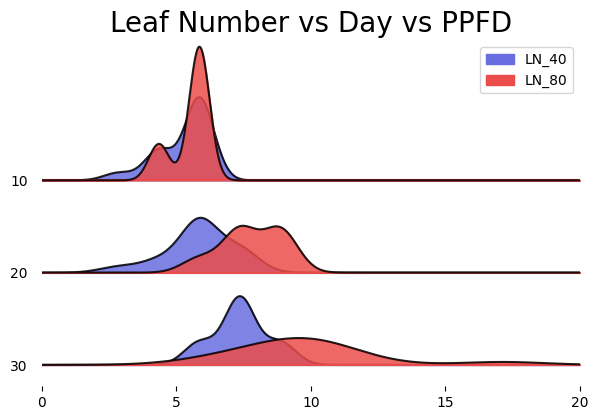

In [53]:
plt.figure()

ax, fig = joyplot(
    data=basil_joy[["LN_40", "LN_80", "Day"]], 
    by='Day',
    column=['LN_40', 'LN_80'],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(6, 4)
)

plt.xlim(0, 20)
plt.title('Leaf Number vs Day vs PPFD', fontsize=20)
plt.show()

<Figure size 600x400 with 0 Axes>

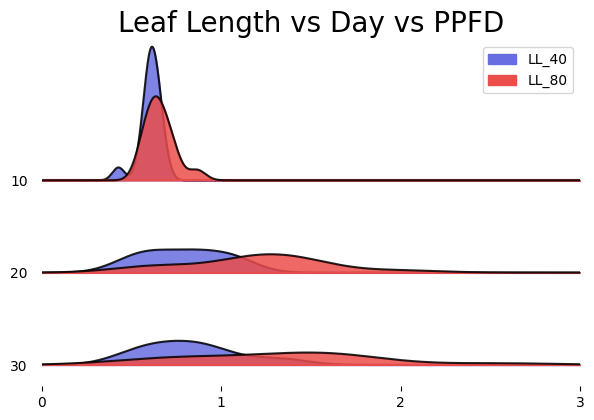

In [54]:
plt.figure()

ax, fig = joyplot(
    data=basil_joy[["LL_40", "LL_80", "Day"]], 
    by='Day',
    column=['LL_40', 'LL_80'],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(6, 4)
)

plt.xlim(0, 3)
plt.title('Leaf Length vs Day vs PPFD', fontsize=20)
plt.show()

<Figure size 600x400 with 0 Axes>

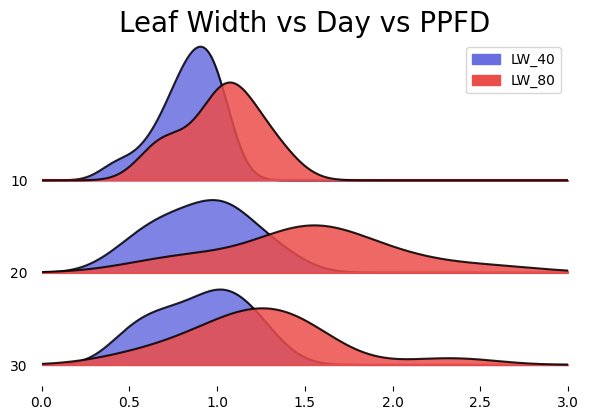

In [55]:
plt.figure()

ax, fig = joyplot(
    data=basil_joy[["LW_40", "LW_80", "Day"]], 
    by='Day',
    column=["LW_40", "LW_80"],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(6, 4)
)

plt.xlim(0, 3)
plt.title('Leaf Width vs Day vs PPFD', fontsize=20)
plt.show()

<Figure size 600x400 with 0 Axes>

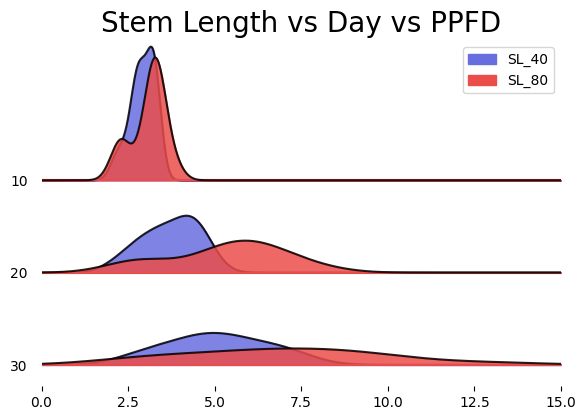

In [56]:
plt.figure()

ax, fig = joyplot(
    data=basil_joy[["SL_40", "SL_80", "Day"]], 
    by='Day',
    column=["SL_40", "SL_80"],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(6, 4)
)

plt.xlim(0, 15)
plt.title('Stem Length vs Day vs PPFD', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7fde96cabe90> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


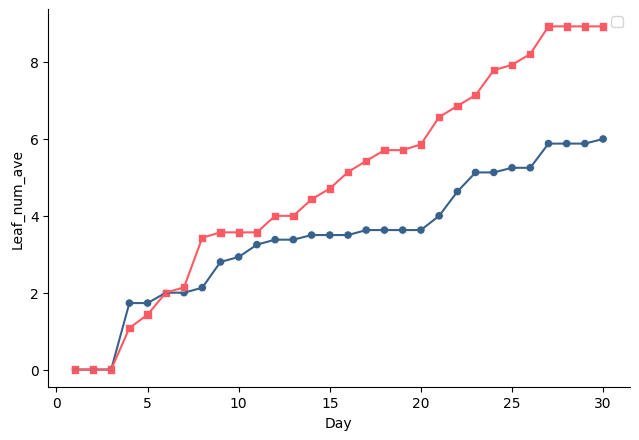

In [57]:
fig = plt.subplots(figsize=(7.5, 5))

line = sns.lineplot(x="Day", y="Leaf_num_ave", hue="PPFD", data=basil_2,
                    palette=["#38618c", "#ff5964"], linewidth=1.5)
point = sns.scatterplot(x="Day", y="Leaf_num_ave", hue="PPFD", data=basil_2,
                        palette=["#38618c", "#ff5964"], style="PPFD", markers={40:"o", 80:"s"})

plt.legend(handles=[line])
line.spines['right'].set_visible(False)
line.spines['top'].set_visible(False)
plt.rcParams['figure.dpi'] = 100